# Control 13/03/17
Fill in code in the cells below, answering the questions.

1/ Make a list (call it "days") with the number of days in each month of the year, 31, 28, 30...

2/ Calculate the average number of days in a month:

3/ Calculate the variance in the length of months:

# Tutorial
## Preliminaries
Before processing the images we need to set up the tools and load the data. We need to import several packages, so before running this notebook you should create an environment (conda or virtualenv) with matplotlib, numpy, and scikit-image, and jupyter. For example:

`conda create env -n BIO399E jupyter matplotlib numpy scipy scikit-image`

and then activate it, e.g. on Mac/Linux:

`source activate BIO399E`

or on windows

`activate BIO399E`

or select the conda env here in Jupyter.

## Modules
First import the standard tools, numpy and matplotlib. These are very well documented packages, more info can be found here:

http://www.matplotlib.org

http://www.numpy.org

In [7]:
import numpy as np
import matplotlib

## Numpy arrays
Lists are a simple way to store collections of data, but they are not very flexible. To deal with numerical data it is better is to use a package called numpy, which stores data in n-dimensional arrays. The simplest is a lot like a list, and we can make it from a list:


In [17]:
days = [31,28,30]
adays = np.array(days)
print adays

[31 28 30]


We can also make an array from scratch and fill it with zeros:

In [16]:
x = np.zeros((12,))
print x

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]


Now we have the days in a numpy array we can use functions from numpy to easily do the control:

In [22]:
average_days = adays.mean()
print average_days

29.6666666667


In [23]:
var_days = adays.var()
print var_days

1.55555555556


### 2-dimensional arrays
Numpy can handle arrays of any number dimensions. For example for images we will use 2-dimensional arrays (in a later class). Here is how to make a 2-d array:

In [28]:
twod = np.zeros((5,5))
print twod

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]


## Exercise 1
Numpy has many functions that perform calculations on arrays, see here 

There is also a function to load data from a text file. 

In this folder you will find 3 text files, 'fluo.csv', 'od.csv', and 't.csv' (time). These files contain comma separated lists of numbers corresponding to fluorescence and od measurements at times t.

1.1 Write code to load these files into 3 numpy arrays `fluo`, `od` and `t`:

In [37]:
fluo = np.fromfile('fluo.csv', sep=',')
print fluo

[ 0.  1.  2.  3.  4.  5.  6.  9.  1.  2.  3.  3.]


1.2 Now calculate the mean and variance of each data set. What else can you calculate with numpy that might be useful?

## Matplotlib, making graphs
Matplotlib is a module that works well with numpy arrays, and can make many kinds of graphs, charts, heatmaps etc. The part of the module that does plotting is called pyplot, we import it like this with some magic to put plots in this notebook:

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

For example, here is a simple plot of the fluorescence:

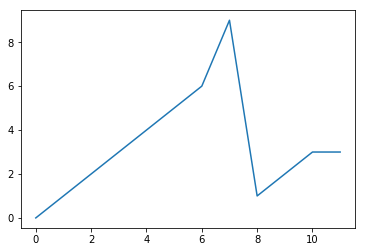

In [41]:
plt.plot(fluo)

Make use of the matplotlib documentation to do the following:

## Exercise 2
2.1 Make a plot for each data set, `fluo`, `od` against time `t`. Label the axes and give the plot a title.

2.2 Do the same as above, but plot the log of the data:

2.3 Plot `fluo` and `od` in the same plot. Try and make the axes different so that you can really see od:

2.4 Plot `fluo/od` for all times:

2.5 Plot histograms of `fluo` and `od`:

## Data analysis, calculating gene expression

Here is a simple model for fluorescent gene expression from a single cell:

\begin{equation}
\frac{dF}{dt} = k(t) - \mu F
\end{equation}

If we have $N \approx OD$ cells, then we measure the sum of their gene expression $I(t) = F(t)OD(t)$ and we can show that:

\begin{equation}
k(t) = \frac{1}{OD}\frac{dI}{dt}
\end{equation}

Given the data above with $I(t)$ in the variable `fluo`, how would you calculate the gene expression rate at each time `t`